In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
sns.set_context("paper", font_scale=0.9)

## full_data_set_v07
* 5min time steps
* 10 days 
* 1e3 to 1e6 particles

In [29]:
path = r'/scratch/local1/speed_test_output/full_dataset_test_v07/full_dataset_test_v07.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','output_stepsize','time'],comment='#')

df['n_time_steps'] = 0
df.loc[(df['data set']=='rom'), 'n_time_steps'] = 2976
df.loc[(df['data set']=='schism_small'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_large'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_estuary'), 'n_time_steps'] = 2881

df.loc[(df['data set']=='rom_old'), 'n_time_steps'] = 2976
df.loc[(df['data set']=='schism_small_old'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_large_old'), 'n_time_steps'] = 2874

df.loc[(df['data set']=='rom_semiold'), 'n_time_steps'] = 2976
df.loc[(df['data set']=='schism_estuary_semiold'), 'n_time_steps'] = 2881

df['time_per_step_per_particle'] = df['time'] / (df['n_time_steps'] * df['#particles'])



In [30]:
# df where model is opendrift
df[df['data set'] == 'schism_estuary']

,model,data set,#particles,output_stepsize,time,n_time_steps,time_per_step_per_particle
26,oceantracker,schism_estuary,1000,0,32.109940,2881,1.114541e-05
27,oceantracker,schism_estuary,10000,0,42.617097,2881,1.479247e-06
28,oceantracker,schism_estuary,100000,0,207.622075,2881,7.206598e-07
29,oceantracker,schism_estuary,1000000,0,1844.918988,2881,6.403745e-07
34,opendrift,schism_estuary,1000,0,238.790495,2881,8.288459e-05
35,opendrift,schism_estuary,10000,0,754.347864,2881,2.618354e-05
36,opendrift,schism_estuary,100000,0,6027.238875,2881,2.092065e-05
37,opendrift,schism_estuary,1000000,0,54567.199671,2881,1.894037e-05


### dual (OT & OD) plots with total wall time

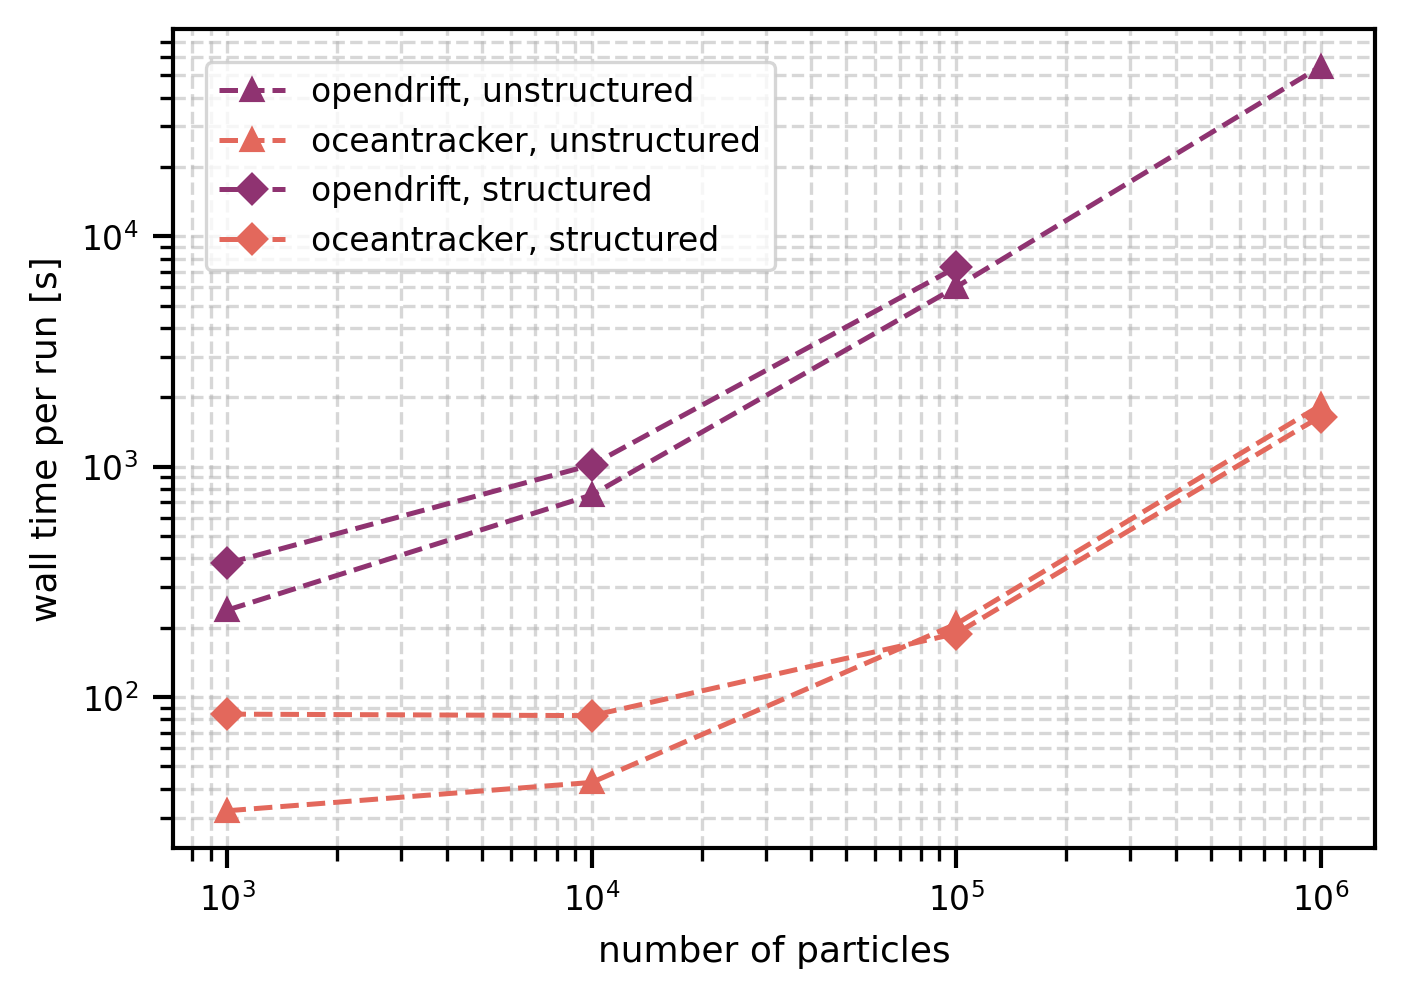

In [39]:
size = 12

plt.figure(figsize=(size/2.53, (size/1.4)/2.53), dpi=300)
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'D',
            label='opendrift, structured'
        )
    
    if item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='opendrift, unstructured'
        )

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'D',
            label='oceantracker, structured')

    if item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = '^',
            label='oceantracker, unstructured')

    

plt.legend()
# plt.title('unstructured grid - time per particle per time step')
plt.xlabel('number of particles')
plt.ylabel('wall time per run [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(loc='best', borderaxespad=1.0)

plt.tight_layout()

plt.savefig('wall_time.png', dpi=300)
plt.savefig('wall_time.svg', dpi=300)
plt.savefig('wall_time.pdf', dpi=300)

### dual (OT & OD) plots with time per particle per step 

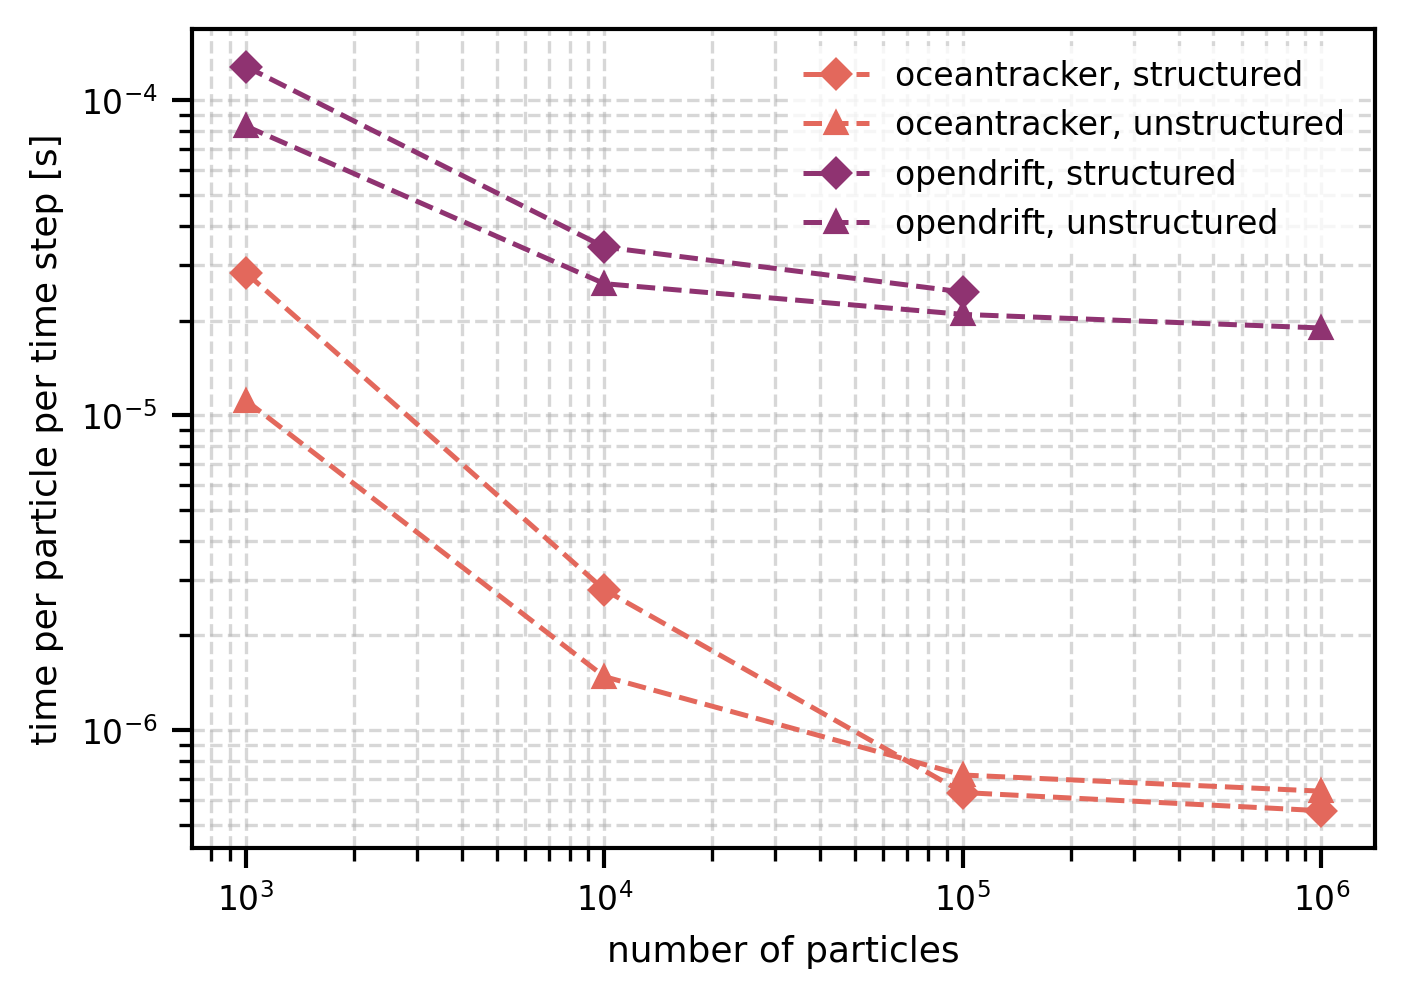

In [40]:
size = 12

plt.figure(figsize=(size/2.53, (size/1.4)/2.53), dpi=300)
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = 'D',
            label='opendrift, structured'
        )
    
    if item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='opendrift, unstructured'
        )

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'D',
            label='oceantracker, structured')

    if item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = '^',
            label='oceantracker, unstructured')



"""
Parcels:
20 h with a time-step size of 30 s. While the sequential execution
time of the pure Python implementation runs in 305:92 s,
the auto-generated JIT kernels can run the same experiment
in 1:74 s,
"""
parcels_time_steps = 20*3600 / 30
parcels_particles = 100
parcels_wall_time = 1.74
parcels_tpp = parcels_wall_time / (parcels_time_steps * parcels_particles)

# # add hlines for parcels
# plt.axhline(y=parcels_tpp, color='black', linestyle='dotted', label='parcels')


plt.legend()
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(labels, handles), key=lambda t: t[0])  # Sort based on labels
labels, handles = zip(*sorted_handles_labels)


# put legend to the side of box
# plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,frameon=False)
plt.legend(handles, labels, loc='best', facecolor='white', edgecolor='none')
# plt.legend(loc='best', borderaxespad=1.0)

plt.tight_layout()

plt.savefig('time_per_particle_per_time_step.png', dpi=300)
plt.savefig('time_per_particle_per_time_step.svg', dpi=300)
plt.savefig('time_per_particle_per_time_step.pdf', dpi=300)

## tmp paralellizationm

In [33]:

# green 500k particle small
x = [4.457768508863399, 0, 1.1470281543274243, 2.111574556830031, 3.0500521376433785, 5.239833159541188, 7.247132429614181, 9.332638164754952, 14.546402502606881, 19.78623566214807, 25.026068821689258]
y = [27.22300140252454, 1.3043478260869565, 2.6507713884992987, 3.702664796633941, 4.838709677419355, 6.816269284712482, 9.17251051893408, 11.52875175315568, 16.49368863955119, 22.76297335203366, 26.339410939691444]

# orange 100k particle small
x = [-0.026068821689259645, 1.981230448383733, 3.0500521376433785, 4.118873826903024, 6.56934306569343, 6.56934306569343, 8.211678832116789, 9.906152241918665, 13.19082377476538, 14.546402502606881, 18.169968717413973, 19.81230448383733, 25.026068821689258]
y = [1.1360448807854138, 3.197755960729313, 4.502103786816269, 5.596072931276297, 7.994389901823282, 7.994389901823282, 9.593267882187938, 11.192145862552595, 14.389901823281907, 15.694249649368864, 19.775596072931275, 21.542776998597475, 26.59186535764376]

# blue 50k particle small
x = [-0.026068821689259645, 4.1710114702815435, 9.384775808133472, 14.572471324296142, 19.78623566214807, 25]
y = [1.0518934081346423, 5.301542776998597, 10.35063113604488, 14.978962131837307, 19.228611500701263, 23.394109396914445]

# green 500k particle large
x = [0, 4.192708333333334, 9.375, 14.557291666666668, 19.817708333333336, 25.026041666666668]
y = [0.7162921348314607, 3.3707865168539324, 6.530898876404494, 9.438202247191011, 12.219101123595506, 14.452247191011235]

# orange 100k particle large
x = [0.026041666666666668, 1.015625, 2.1614583333333335, 9.401041666666668, 14.557291666666668, 19.84375, 24.973958333333336]
y = [0.547752808988764, 1.053370786516854, 1.4325842696629214, 4.508426966292134, 6.235955056179775, 7.794943820224719, 8.764044943820224]

# blue 50k particle large
x = [0.026041666666666668, 1.3020833333333335, 4.166666666666667, 9.401041666666668, 14.583333333333334, 19.791666666666668, 25]
y = [0.33707865168539325, 0.7584269662921348, 1.6853932584269662, 3.1601123595505616, 4.676966292134831, 5.561797752808989, 5.941011235955056]



In [34]:
data = {
    "small": {
        "500k": {
            "x": [0,   1.15,   2.11,   3.05,   5.24,   7.25,   9.33,   14.55,   19.79,   25.03],
            "y": [1.30,  2.65,  3.70,  4.84,  6.82,  9.17, 11.53,  16.49,  22.76,  26.34]
        },
        "100k": {
            "x": [-0.03,  1.98,  3.05,  4.12,  6.57,  6.57,  8.21,  9.91,  13.19,  14.55,  18.17,  19.81,  25.03],
            "y": [1.14,  3.20,  4.50,  5.60,  7.99,  7.99,  9.59, 11.19,  14.39,  15.69,  19.78,  21.54,  26.59]
        },
        "50k": {
            "x": [-0.03,  4.17,  9.38,  14.57,  19.79,  25],
            "y": [1.05,  5.30,  10.35,  14.98,  19.23,  23.39]
        }
    },
    "large": {
        "500k": {
            "x": [0,  4.19,  9.38,  14.56,  19.82,  25.03],
            "y": [0.72,  3.37,  6.53,  9.44,  12.22,  14.45]
        },
        "100k": {
            "x": [0.03,  1.02,  2.16,  9.40,  14.56,  19.84,  24.97],
            "y": [0.55,  1.05,  1.43,  4.51,  6.24,  7.79,  8.76]
        },
        "50k": {
            "x": [0.03,  1.30,  4.17,  9.40,  14.58,  19.79,  25],
            "y": [0.34,  0.76,  1.69,  3.16,  4.68,  5.56,  5.94]
        }
    }
}

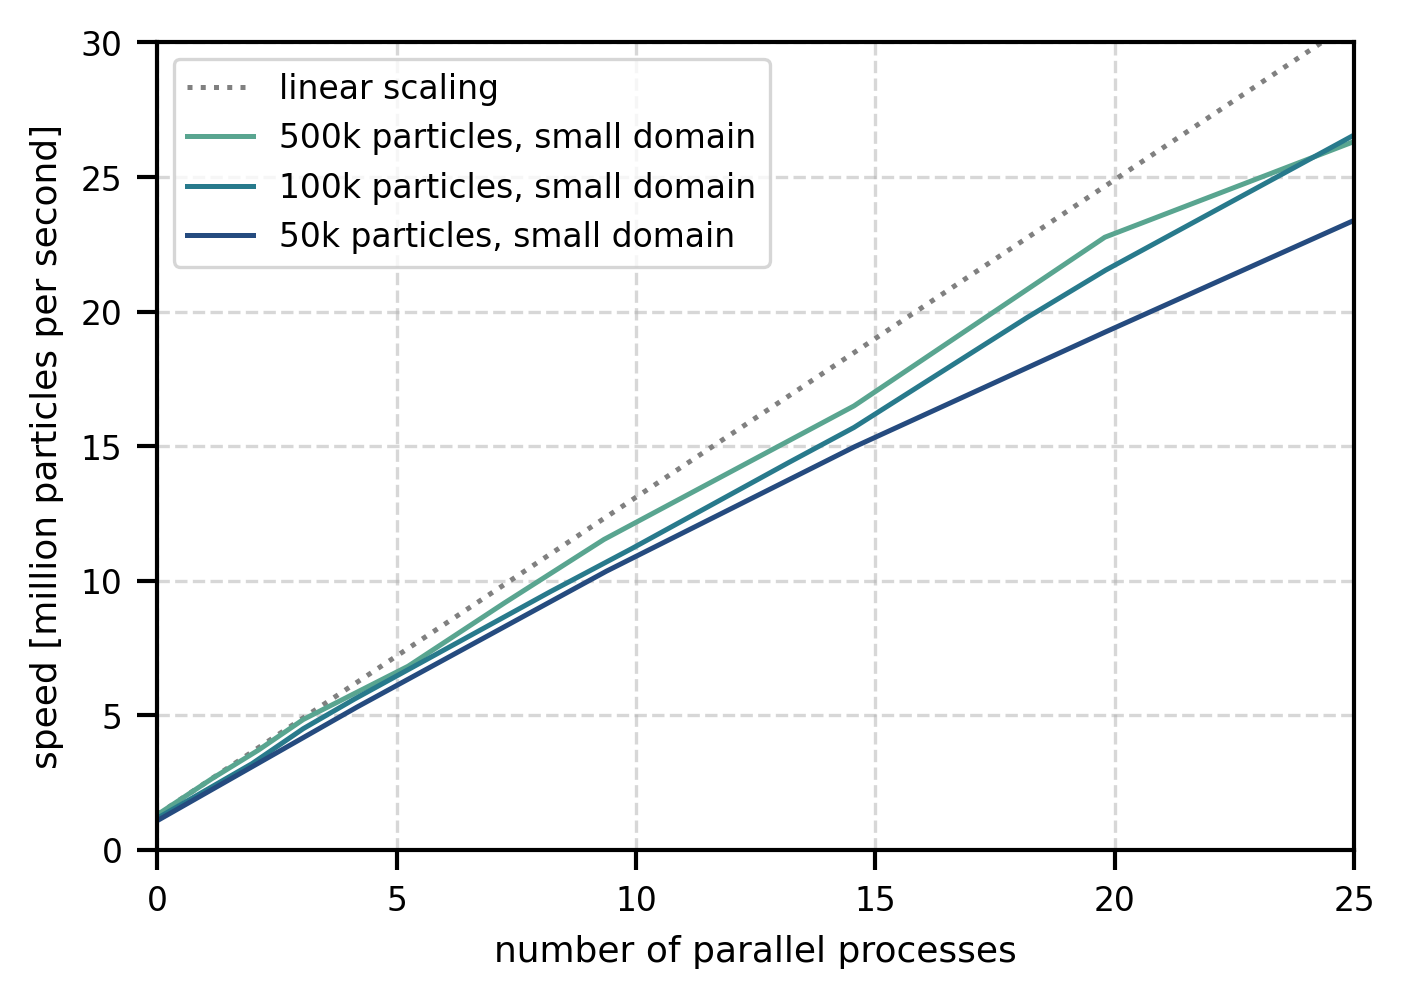

In [41]:
size = 12

fig, ax = plt.subplots(figsize=(size/2.53, (size/1.4)/2.53), dpi=300)
colors = [sns.color_palette("crest")[1],sns.color_palette("crest")[3],sns.color_palette("crest")[5]]

ax.plot([0, 25], [1.3, 30.8], color='gray', ls='dotted',label='linear scaling')
ax.plot(data['small']['500k']['x'], data['small']['500k']['y'], color=colors[0], ls = 'solid', label='500k particles, small domain')
ax.plot(data['small']['100k']['x'], data['small']['100k']['y'], color=colors[1], ls = 'solid', label='100k particles, small domain')
ax.plot(data['small']['50k']['x'], data['small']['50k']['y'], color=colors[2], ls = 'solid', label='50k particles, small domain')


plt.legend()
plt.xlabel('number of parallel processes')
plt.ylabel('speed [million particles per second]')
plt.grid(True, which='major', axis='both', ls='--', alpha=0.5)

plt.xlim(0, 25)
plt.ylim(0,30)

plt.tight_layout()

plt.savefig('Speed_Cpu_small.png', dpi=300)
# plt.savefig('time_per_particle_per_time_step.svg', dpi=300)
# plt.savefig('time_per_particle_per_time_step.pdf', dpi=300)

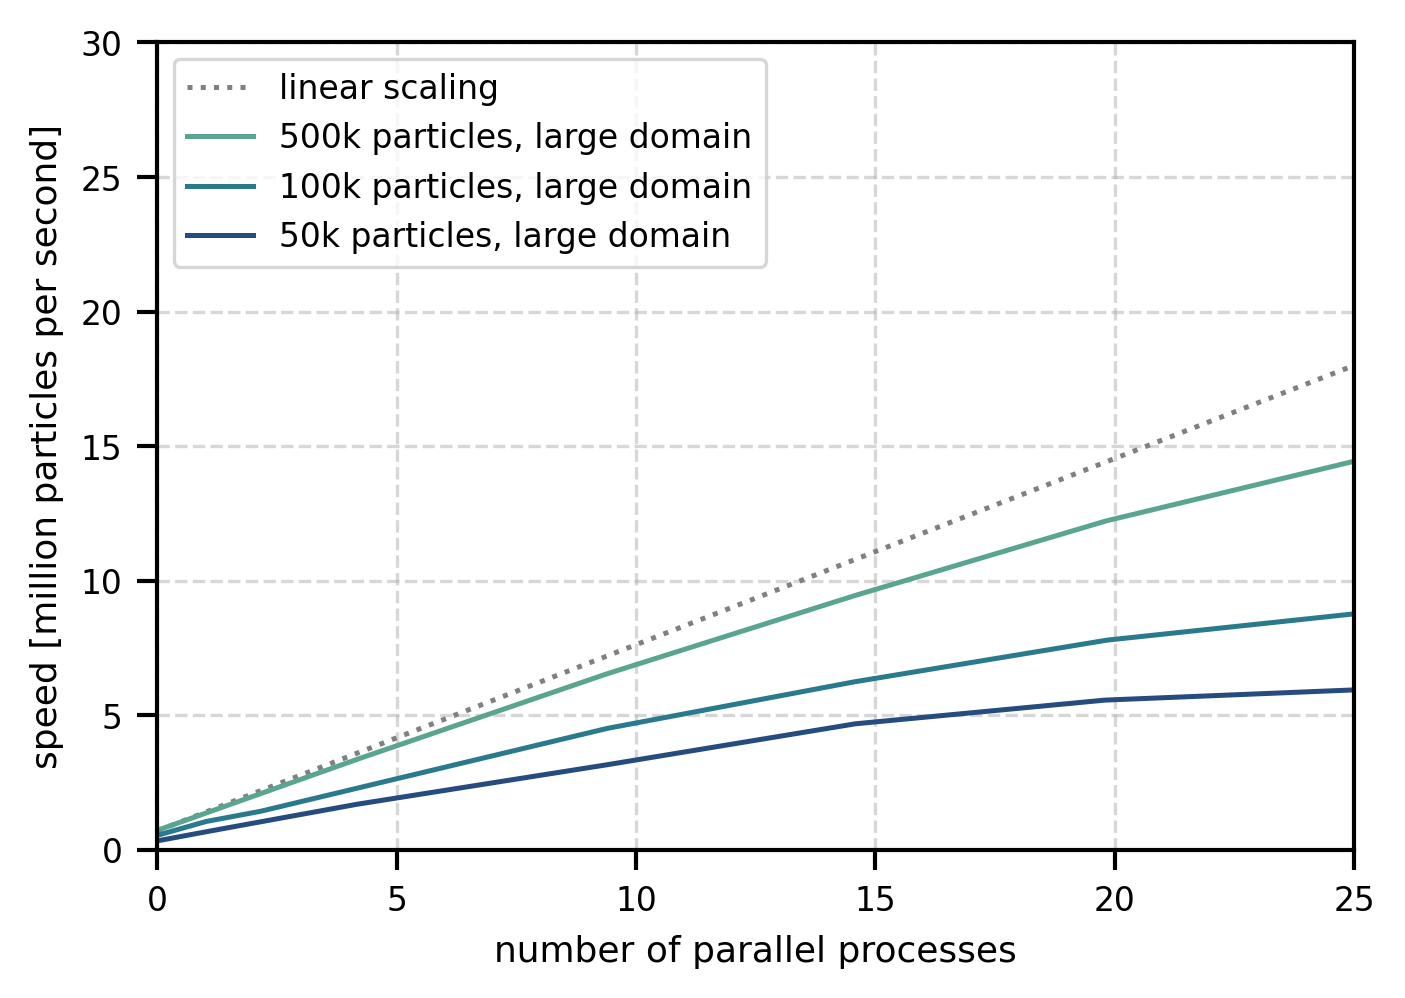

In [42]:
size = 12

fig, ax = plt.subplots(figsize=(size/2.53, (size/1.4)/2.53), dpi=300)
colors = [sns.color_palette("crest")[1],sns.color_palette("crest")[3],sns.color_palette("crest")[5]]

ax.plot([0, 25], [0.7, 18], color='gray', ls='dotted',label='linear scaling')
ax.plot(data['large']['500k']['x'], data['large']['500k']['y'], color=colors[0], ls = 'solid', label='500k particles, large domain')
ax.plot(data['large']['100k']['x'], data['large']['100k']['y'], color=colors[1], ls = 'solid', label='100k particles, large domain')
ax.plot(data['large']['50k']['x'], data['large']['50k']['y'], color=colors[2], ls = 'solid', label='50k particles, large domain')

# upper left
plt.legend(loc='upper left')
plt.xlabel('number of parallel processes')
plt.ylabel('speed [million particles per second]')
plt.grid(True, which='major', axis='both', ls='--', alpha=0.5)

plt.xlim(0, 25)
plt.ylim(0,30)

plt.tight_layout()

plt.savefig('Speed_Cpu_sounds.png', dpi=300)
# plt.savefig('time_per_particle_per_time_step.svg', dpi=300)
# plt.savefig('time_per_particle_per_time_step.pdf', dpi=300)

### dual (OT & OD) plots with wall time per million particles (per 10d a 5min)

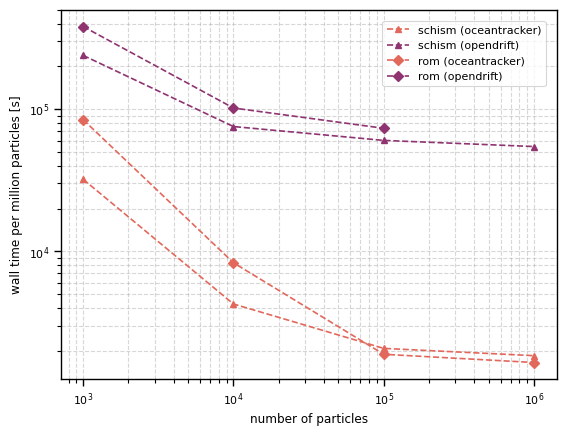

In [37]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'rom':

        ot_subset = df[(df['data set'] == item) * (df['model'] == 'oceantracker')]
        od_subset = df[(df['data set'] == item) * (df['model'] == 'opendrift')]

        plt.plot(
            ot_subset['#particles'],
            ot_subset['time']/ot_subset['#particles']*1e6,
            color=colors[0],
            ls = 'dashed',
            marker = 'D',
            label='rom (oceantracker)')

        plt.plot(
            od_subset['#particles'],
            od_subset['time']/od_subset['#particles']*1e6,
            color=colors[1],
            ls = 'dashed',
            marker = 'D',
            label='rom (opendrift)'
        )

    if item == 'schism_estuary':
        ot_subset = df[(df['data set'] == item) * (df['model'] == 'oceantracker')]
        od_subset = df[(df['data set'] == item) * (df['model'] == 'opendrift')]


        plt.plot(
            ot_subset['#particles'],
            ot_subset['time']/ot_subset['#particles']*1e6,
            color=colors[0],
            ls = 'dashed',
            marker = '^',
            label='schism (oceantracker)')

        plt.plot(
            od_subset['#particles'],
            od_subset['time']/od_subset['#particles']*1e6,
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='schism (opendrift)'
        )

    
plt.legend()
plt.xlabel('number of particles')
plt.ylabel('wall time per million particles [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(loc='best', borderaxespad=1.0)

plt.savefig('timer_per_million_particles.png', dpi=300)
plt.savefig('timer_per_million_particles.svg', dpi=300)
plt.savefig('timer_per_million_particles.pdf', dpi=300)

### OD/OT ratio plots

In [52]:
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

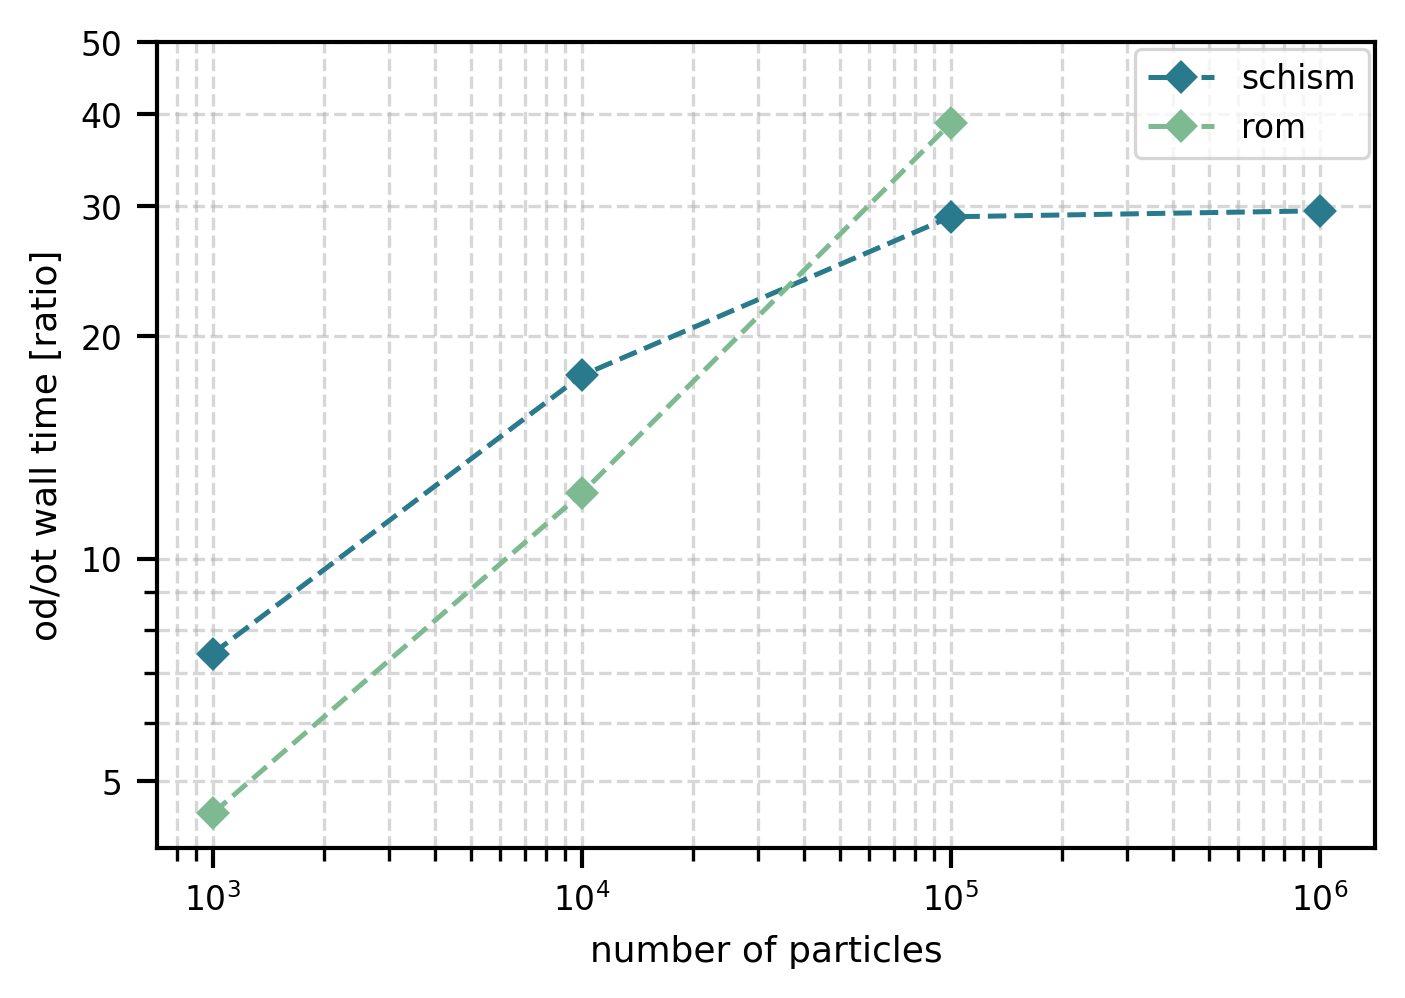

In [43]:
size = 12

plt.figure(figsize=(size/2.53, (size/1.4)/2.53), dpi=300)
colors = [sns.color_palette("crest")[0],sns.color_palette("crest")[3]]
for item in set(df['data set']):

    if item == 'rom':

        ot_subset = df[(df['data set'] == item) * (df['model'] == 'oceantracker')]
        od_subset = df[(df['data set'] == item) * (df['model'] == 'opendrift')]

        plt.plot(
            ot_subset['#particles'][:3],
            od_subset['time'][:3].values/ot_subset['time'][:3].values,
            color=colors[0],
            ls = 'dashed',
            marker = 'D',
            label='rom')


    if item == 'schism_estuary':

        ot_subset = df[(df['data set'] == item) * (df['model'] == 'oceantracker')]
        od_subset = df[(df['data set'] == item) * (df['model'] == 'opendrift')]

        plt.plot(
            ot_subset['#particles'][:4],
            od_subset['time'][:4].values/ot_subset['time'][:4].values,
            color=colors[1],
            ls = 'dashed',
            marker = 'D',
            label='schism')

        # plt.plot(
        #     ot_subset['#particles'][:4],
        #     ot_subset['time'][:4].values/od_subset['time'][:4].values,
        #     color=colors[1],
        #     ls = 'dashed',
        #     marker = 'D',
        #     label='schism')


plt.legend()
plt.xlabel('number of particles')
plt.ylabel('od/ot wall time [ratio]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)
# manually add tick labels at minor y axis ticks (2*10**1, 3*10**1, 4*10**1, 5*10**1)
plt.yticks([5*10**0,1*10**1,2*10**1, 3*10**1, 4*10**1, 5*10**1], ['5','10','20','30','40','50'])


# put legend to the side of box
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(loc='best', borderaxespad=0.2)

plt.tight_layout()

plt.savefig('od_ot_ratio.png', dpi=300)
plt.savefig('od_ot_ratio.svg', dpi=300)
plt.savefig('od_ot_ratio.pdf', dpi=300)

In [78]:
1/(ot_subset['time'][:4].values/od_subset['time'])

34     7.436653
35    17.700592
36    29.029856
37    29.577017
Name: time, dtype: float64

### individual plots with time per particle per step

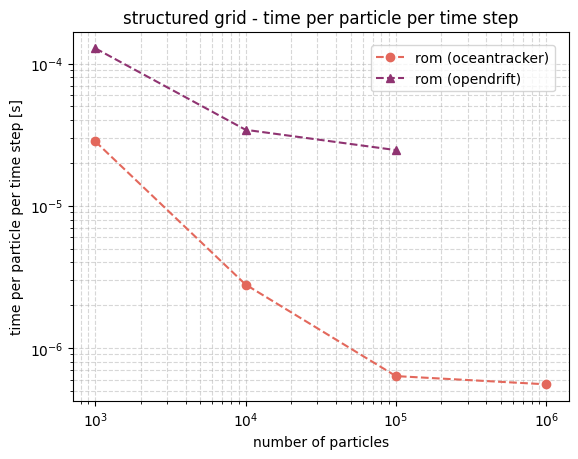

In [12]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    

plt.legend()
plt.title('structured grid - time per particle per time step')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(loc='best', borderaxespad=1.0)

plt.savefig('rom_time_per_particle_per_time_step.png', dpi=300)
plt.savefig('rom_time_per_particle_per_time_step.svg', dpi=300)
plt.savefig('rom_time_per_particle_per_time_step.pdf', dpi=300)

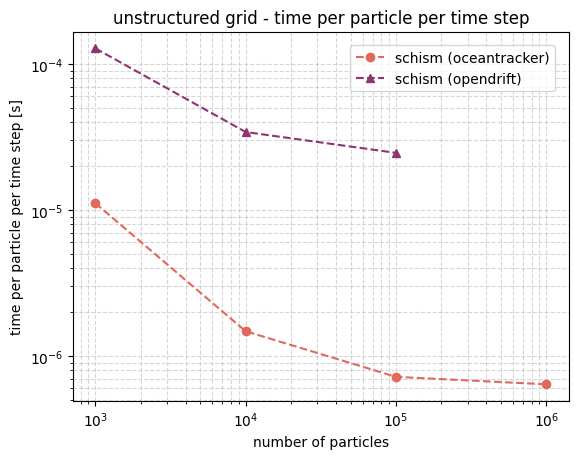

In [15]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='schism (oceantracker)')

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='schism (opendrift)'
        )

    

plt.legend()
plt.title('unstructured grid - time per particle per time step')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(loc='best', borderaxespad=1.0)

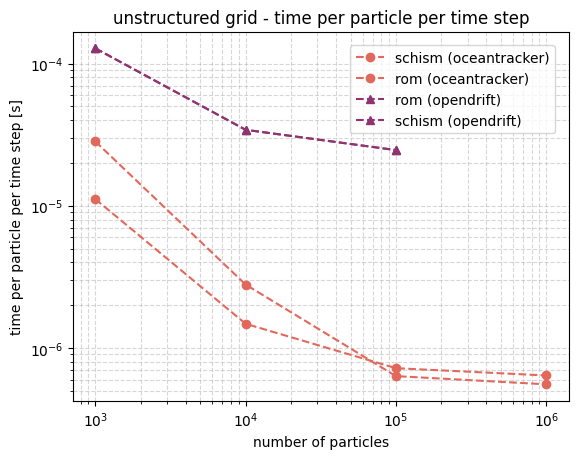

In [17]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    if item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='schism (oceantracker)')

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='schism (opendrift)'
        )

    

plt.legend()
plt.title('unstructured grid - time per particle per time step')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(loc='best', borderaxespad=1.0)

### one plot for schism

In [4]:
df[(df['data set'] == 'rom')]

,model,data set,#particles,output_stepsize,time,n_time_steps,time_per_step_per_particle
15,opendrift,rom,1000,0,381.187026,2976,1.280870e-04
16,opendrift,rom,10000,0,1018.733819,2976,3.423165e-05
17,opendrift,rom,100000,0,7333.279801,2976,2.464140e-05
30,oceantracker,rom,1000,0,84.345119,2976,2.834177e-05
31,oceantracker,rom,10000,0,83.079220,2976,2.791640e-06
32,oceantracker,rom,100000,0,188.690301,2976,6.340400e-07
33,oceantracker,rom,1000000,0,1651.593171,2976,5.549708e-07


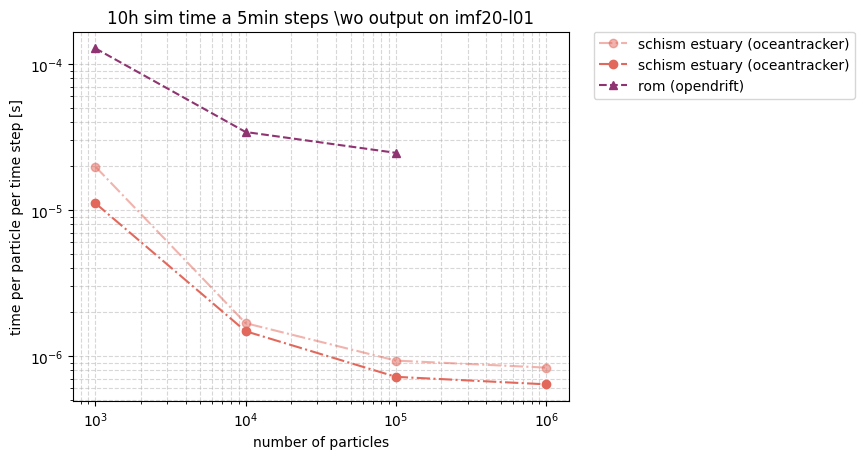

In [5]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'rom':
        # plt.plot(
        #     df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
        #     df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
        #     color=colors[0],
        #     ls = 'dashed',
        #     marker = 'o',
        #     label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    if item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashdot',
            marker = 'o',
            label='schism estuary (oceantracker)')

    elif item == 'schism_estuary_semiold':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashdot',
            marker = 'o',
            label='schism estuary (oceantracker)',
            alpha=0.5)
    

plt.legend()
plt.title('10h sim time a 5min steps \wo output on imf20-l01')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [7]:
tpp_rom = df[(df['data set'] == 'rom') * (df['model'] == 'opendrift') * (df['#particles'] == 100000)]['time_per_step_per_particle'].iloc[0]
tpp_schism_estuary = df[(df['data set'] == 'schism_estuary') * (df['model'] == 'oceantracker') * (df['#particles'] == 100000)]['time_per_step_per_particle'].iloc[0]
tpp_schism_estuary_semiold = df[(df['data set'] == 'schism_estuary_semiold') * (df['model'] == 'oceantracker') * (df['#particles'] == 100000)]['time_per_step_per_particle'].iloc[0]

# print(f'ot_previous/od: {tpp_rom/tpp_schism_estuary_semiold}')
print(f'ot/od: {tpp_rom/tpp_schism_estuary}')


ot/od: 34.19283102619311


In [18]:
particle_count = 10000
data_set = 'schism_estuary'

tpp_rom = df[(df['data set'] == data_set) * (df['model'] == 'opendrift') * (df['#particles'] == particle_count)]['time_per_step_per_particle'].iloc[0]
tpp_schism_estuary = df[(df['data set'] == data_set) * (df['model'] == 'oceantracker') * (df['#particles'] == particle_count)]['time_per_step_per_particle'].iloc[0]

# print(f'ot_previous/od: {tpp_rom/tpp_schism_estuary_semiold}')
print(f'ot/od: {tpp_rom/tpp_schism_estuary}')


ot/od: 17.700592417170036


In [27]:
particle_count = 1e6
data_set = 'schism_estuary'
model = 'opendrift'

wall_time = df[(df['data set'] == data_set) * (df['model'] == model) * (df['#particles'] == particle_count)]['time']
# from seconds to hours
print(f'wall time: {wall_time.iloc[0]/3600}')

wall time: 15.157555464166668


In [28]:
particle_count = 1e6
data_set = 'schism_estuary'
model = 'oceantracker'

wall_time = df[(df['data set'] == data_set) * (df['model'] == model) * (df['#particles'] == particle_count)]['time']
# from seconds to hours
print(f'wall time: {wall_time.iloc[0]/3600}')

wall time: 0.5124774966666666


In [30]:
particle_count = 1e6
data_set = 'rom'
model = 'oceantracker'

rom = df[(df['data set'] == data_set) * (df['model'] == model) * (df['#particles'] == particle_count)]['time_per_step_per_particle'].iloc[0]

particle_count = 1e6
data_set = 'schism_estuary'
model = 'oceantracker'

schism = df[(df['data set'] == data_set) * (df['model'] == model) * (df['#particles'] == particle_count)]['time_per_step_per_particle'].iloc[0]

schism/rom


1.1538886214395376

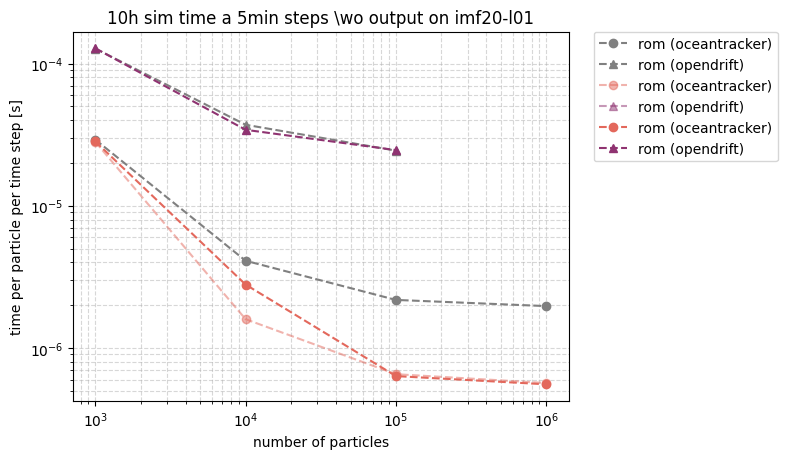

In [7]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    elif item == 'rom_semiold':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            alpha=0.5,
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            alpha=0.5,
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )
    

    elif item == 'rom_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

plt.legend()
plt.title('10h sim time a 5min steps \wo output on imf20-l01')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [8]:
tpp_rom = df[(df['data set'] == 'rom') * (df['model'] == 'opendrift') * (df['#particles'] == 100000)]['time_per_step_per_particle'].iloc[0]
tpp_schism_estuary = df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker') * (df['#particles'] == 100000)]['time_per_step_per_particle'].iloc[0]
tpp_schism_estuary_semiold = df[(df['data set'] == 'rom_semiold') * (df['model'] == 'oceantracker') * (df['#particles'] == 100000)]['time_per_step_per_particle'].iloc[0]

print(f'ot_previous/od: {tpp_rom/tpp_schism_estuary_semiold}')
print(f'ot/od: {tpp_rom/tpp_schism_estuary}')

ot_previous/od: 37.67051080255072
ot/od: 38.86410569136778


In [ ]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):

    if item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    elif item == 'rom_semiold':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            alpha=0.5,
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            alpha=0.5,
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )
    

    elif item == 'rom_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )
    

plt.legend()
plt.title('10h sim time a 5min steps \wo output on imf20-l01')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

schism_large_old
schism_estuary
rom_old
schism_small_old
rom


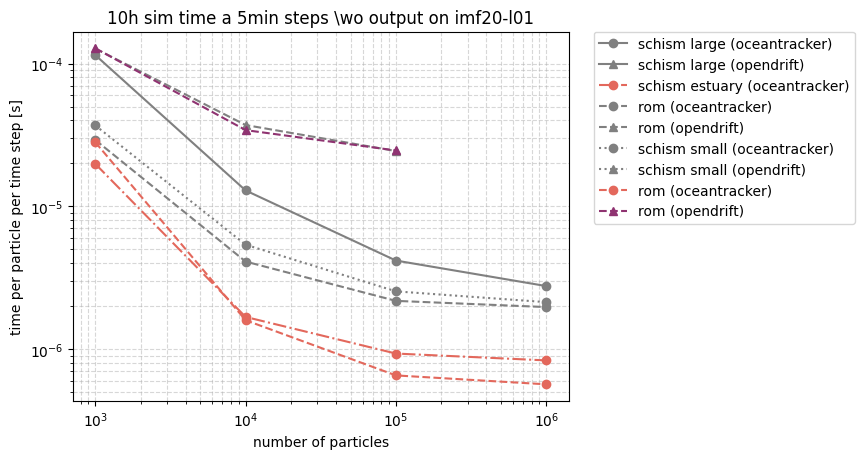

In [ ]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'solid',
            marker = '^',
            label='schism large (opendrift)')

    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dotted',
            marker = '^',
            label='schism small (opendrift)'
        )
    
    elif item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashdot',
            marker = 'o',
            label='schism estuary (oceantracker)')

        # plt.plot(
        #     df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
        #     df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
        #     color=colors[1],
        #     ls = 'dashdot',
        #     marker = '^',
        #     label='schism estuary (opendrift)'
        # )


    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    elif item == 'rom_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    elif item == 'schism_small_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dotted',
            marker = '^',
            label='schism small (opendrift)'
        )
    
    elif item == 'schism_large_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'solid',
            marker = '^',
            label='schism large (opendrift)'
        )


plt.legend()
plt.title('10h sim time a 5min steps \wo output on imf20-l01')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('speed_test_full_dataset_v06.png', dpi=300, bbox_inches='tight')


## full_data_set_v06
* 5min time steps
* 10 days 
* 1e3 to 1e6 particles

In [ ]:
path = r'/scratch/local1/speed_test_output/full_dataset_test_v06/full_dataset_test_v06.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','output_stepsize','time'],comment='#')

df['n_time_steps'] = 0
df.loc[(df['data set']=='rom'), 'n_time_steps'] = 2976
df.loc[(df['data set']=='schism_small'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_large'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_estuary'), 'n_time_steps'] = 2881
df.loc[(df['data set']=='rom_old'), 'n_time_steps'] = 2976
df.loc[(df['data set']=='schism_small_old'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_large_old'), 'n_time_steps'] = 2874
df['time_per_step_per_particle'] = df['time'] / (df['n_time_steps'] * df['#particles'])

In [ ]:
df

,model,data set,#particles,output_stepsize,time,n_time_steps,time_per_step_per_particle
0,oceantracker,rom_old,1000,0,86.857700,2976,2.918606e-05
1,oceantracker,rom_old,10000,0,122.167700,2976,4.105097e-06
2,oceantracker,rom_old,100000,0,648.028600,2976,2.177515e-06
3,oceantracker,rom_old,1000000,0,5862.946600,2976,1.970076e-06
4,oceantracker,schism_small_old,1000,0,106.112000,2874,3.692136e-05
5,oceantracker,schism_small_old,10000,0,154.887400,2874,5.389262e-06
6,oceantracker,schism_small_old,100000,0,729.665800,2874,2.538851e-06
7,oceantracker,schism_small_old,1000000,0,6129.705500,2874,2.132813e-06
8,oceantracker,schism_large_old,1000,0,330.003470,2874,1.148238e-04
9,oceantracker,schism_large_old,10000,0,371.576559,2874,1.292890e-05


schism_large_old
schism_estuary
rom_old
schism_small_old
rom


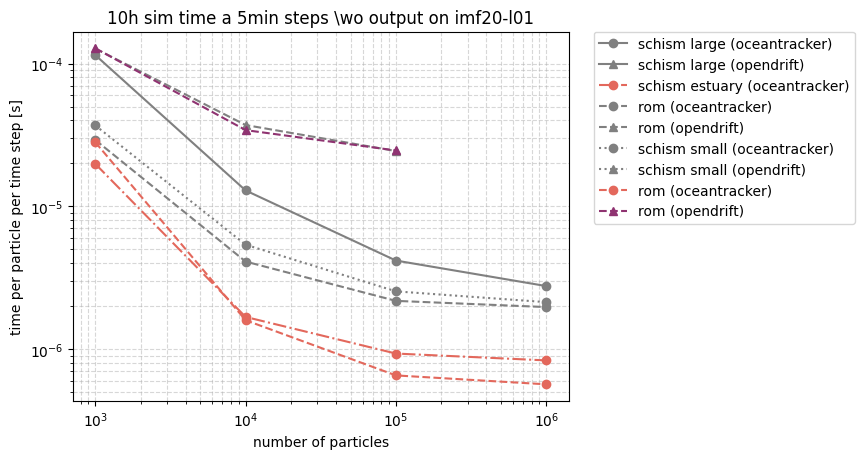

In [ ]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'solid',
            marker = '^',
            label='schism large (opendrift)')

    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dotted',
            marker = '^',
            label='schism small (opendrift)'
        )
    
    elif item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashdot',
            marker = 'o',
            label='schism estuary (oceantracker)')

        # plt.plot(
        #     df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
        #     df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
        #     color=colors[1],
        #     ls = 'dashdot',
        #     marker = '^',
        #     label='schism estuary (opendrift)'
        # )


    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    elif item == 'rom_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    elif item == 'schism_small_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dotted',
            marker = '^',
            label='schism small (opendrift)'
        )
    
    elif item == 'schism_large_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'solid',
            marker = '^',
            label='schism large (opendrift)'
        )


plt.legend()
plt.title('10h sim time a 5min steps \wo output on imf20-l01')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('speed_test_full_dataset_v06.png', dpi=300, bbox_inches='tight')


## full_data_set_v06
* 5min time steps
* 10 days 
* 1e3 to 1e6 particles

In [10]:
path = r'/scratch/local1/speed_test_output/full_dataset_test_v06/full_dataset_test_v06.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','output_stepsize','time'],comment='#')

df['n_time_steps'] = 0
df.loc[(df['data set']=='rom'), 'n_time_steps'] = 2976
df.loc[(df['data set']=='schism_small'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_large'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_estuary'), 'n_time_steps'] = 2881
df.loc[(df['data set']=='rom_old'), 'n_time_steps'] = 2976
df.loc[(df['data set']=='schism_small_old'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_large_old'), 'n_time_steps'] = 2874
df['time_per_step_per_particle'] = df['time'] / (df['n_time_steps'] * df['#particles'])

In [11]:
df

,model,data set,#particles,output_stepsize,time,n_time_steps,time_per_step_per_particle
0,oceantracker,rom_old,1000,0,86.857700,2976,2.918606e-05
1,oceantracker,rom_old,10000,0,122.167700,2976,4.105097e-06
2,oceantracker,rom_old,100000,0,648.028600,2976,2.177515e-06
3,oceantracker,rom_old,1000000,0,5862.946600,2976,1.970076e-06
4,oceantracker,schism_small_old,1000,0,106.112000,2874,3.692136e-05
5,oceantracker,schism_small_old,10000,0,154.887400,2874,5.389262e-06
6,oceantracker,schism_small_old,100000,0,729.665800,2874,2.538851e-06
7,oceantracker,schism_small_old,1000000,0,6129.705500,2874,2.132813e-06
8,oceantracker,schism_large_old,1000,0,330.003470,2874,1.148238e-04
9,oceantracker,schism_large_old,10000,0,371.576559,2874,1.292890e-05


schism_large_old
schism_estuary
rom_old
schism_small_old
rom


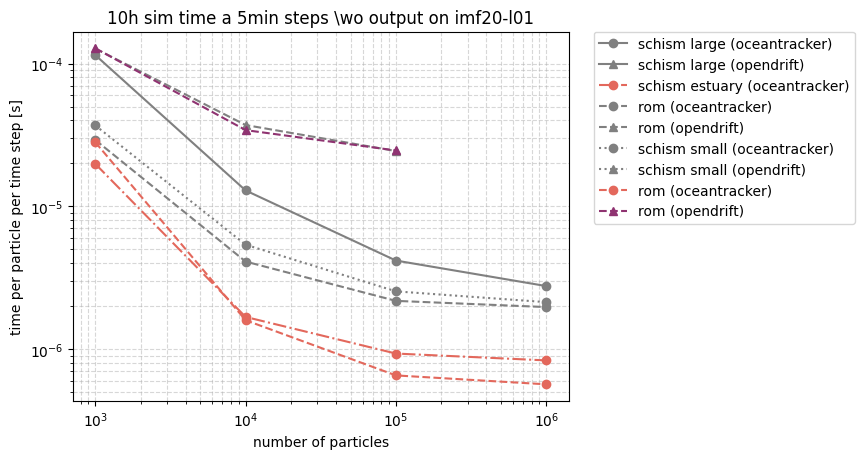

In [29]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'solid',
            marker = '^',
            label='schism large (opendrift)')

    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dotted',
            marker = '^',
            label='schism small (opendrift)'
        )
    
    elif item == 'schism_estuary':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashdot',
            marker = 'o',
            label='schism estuary (oceantracker)')

        # plt.plot(
        #     df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
        #     df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
        #     color=colors[1],
        #     ls = 'dashdot',
        #     marker = '^',
        #     label='schism estuary (opendrift)'
        # )


    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    elif item == 'rom_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dashed',
            marker = '^',
            label='rom (opendrift)'
        )

    elif item == 'schism_small_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'dotted',
            marker = '^',
            label='schism small (opendrift)'
        )
    
    elif item == 'schism_large_old':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color='gray',
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color='gray',
            ls = 'solid',
            marker = '^',
            label='schism large (opendrift)'
        )


plt.legend()
plt.title('10h sim time a 5min steps \wo output on imf20-l01')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)

# put legend to the side of box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('speed_test_full_dataset_v06.png', dpi=300, bbox_inches='tight')


In [19]:
# approximate speed up between opendrift and oceantracker
# rom
speed_up_rom = df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time_per_step_per_particle'].mean() / df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time_per_step_per_particle'].mean()


8.054166102471296


In [26]:
ot_rom = df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time_per_step_per_particle']

od_rom = df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time_per_step_per_particle']
# add nan to make the two arrays the same length
od_rom = np.append(od_rom, np.nan)

In [27]:
od_rom/ot_rom

15     4.552308
16    21.487659
17    37.670511
18          NaN
Name: time_per_step_per_particle, dtype: float64

## full_data_set_v04
* 5min time steps
* 10 days 
* 1e3 to 1e6 particles

In [22]:
path = r'/home/laurins/data/output/full_dataset_test_v04/full_dataset_test_v04.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','output_stepsize','time'],comment='#')

df['n_time_steps'] = 0
df.loc[(df['data set']=='rom'), 'n_time_steps'] = 2976
df.loc[(df['data set']=='schism_small'), 'n_time_steps'] = 2874
df.loc[(df['data set']=='schism_large'), 'n_time_steps'] = 2874
df['time_per_step_per_particle'] = df['time'] / (df['n_time_steps'] * df['#particles'])

schism_small
schism_large
rom


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

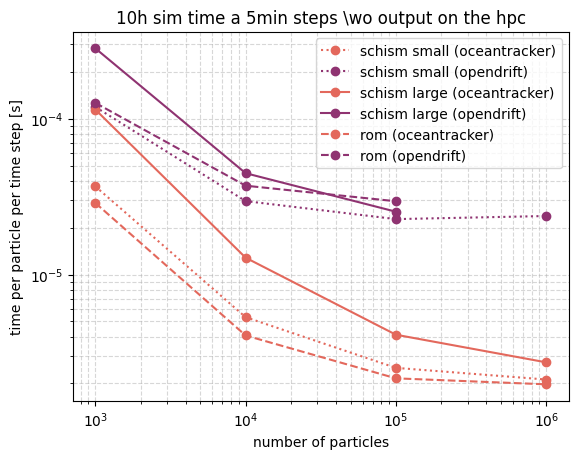

In [21]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')

    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)'
        )


    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time_per_step_per_particle'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time_per_step_per_particle'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)'
        )


plt.legend()
plt.title('10h sim time a 5min steps \wo output on the hpc')
plt.xlabel('number of particles')
plt.ylabel('time per particle per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)
plt.grid

schism_small
schism_large
rom


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

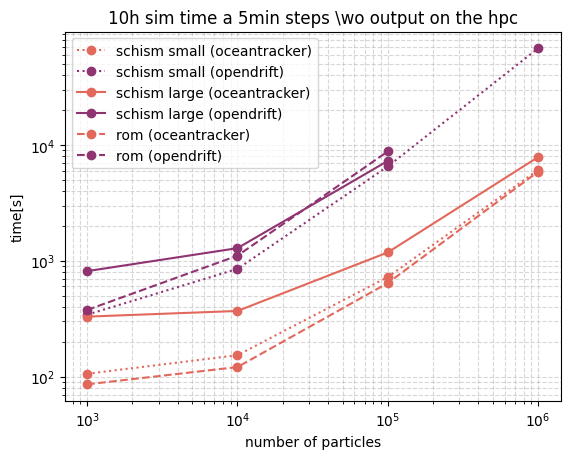

In [20]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')
        
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)'
        )

    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')
        
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)'
        )

    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)'
        )


plt.legend()
plt.title('10h sim time a 5min steps \wo output on the hpc')
plt.xlabel('number of particles')
plt.ylabel('time[s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)
plt.grid

schism_small
schism_large
rom


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

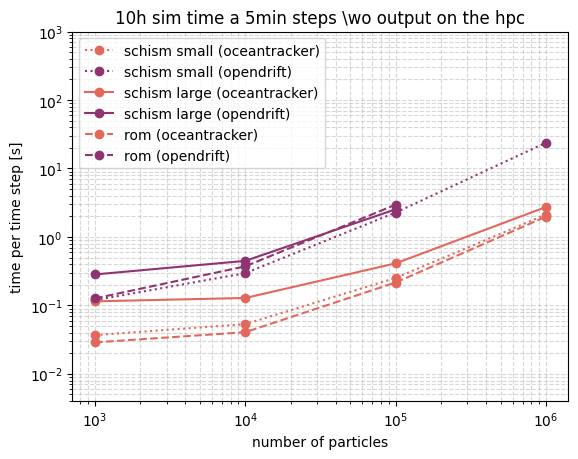

In [19]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time']/df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['n_time_steps'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time']/df[(df['data set'] == item) * (df['model'] == 'opendrift')]['n_time_steps'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
        
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time']/df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['n_time_steps'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time']/df[(df['data set'] == item) * (df['model'] == 'opendrift')]['n_time_steps'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')

    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time']/df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['n_time_steps'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time']/df[(df['data set'] == item) * (df['model'] == 'opendrift')]['n_time_steps'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.title('10h sim time a 5min steps \wo output on the hpc')
plt.xlabel('number of particles')
plt.ylabel('time per time step [s]')
plt.xscale('log')
plt.yscale('log')
plt.ylim(4e-3,1e3)
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)
plt.grid

## time per particle step (on full_dataset_test_v03)

In [37]:
path = r'/home/laurins/data/output/full_dataset_test_v03/full_dataset_test_v03.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','output_stepsize','time'],comment='#')
df = df[df['output_stepsize'] == 3600]
df['time'] = df['time']/1410 #number of steps

schism_large
schism_small
rom


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

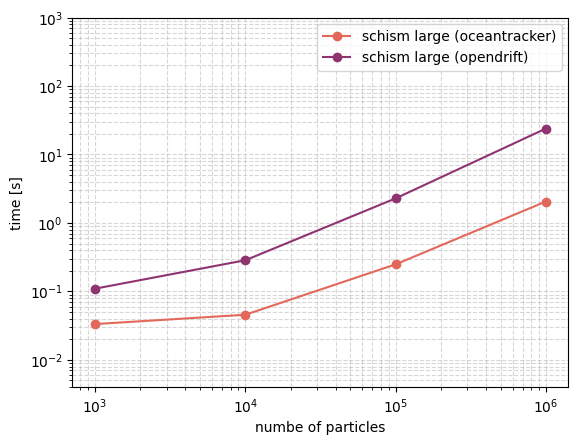

In [41]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.ylim(4e-3,1e3)
plt.grid(True, which='both', axis='both', ls='--', alpha=0.5)
plt.grid

In [ ]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}

print(f'time per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | time per particle [ms]\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['oceantracker'][1]*1e3:> 2.8f}")
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]*1e3:>2.8f}")
    

print(f'\nspeed-up per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | Speed up\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1]}")

time per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | time per particle [ms]	
---------------------------------------
schism_large   	 |  2.85253550
schism_large   	 | 33.69622067
schism_small   	 |  2.70658847
schism_small   	 | 32.25403244
rom            	 |  2.58930905
rom            	 | 33.99872778

speed-up per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | Speed up	
---------------------------------------
schism_large   	 | 11.81272613590152
schism_small   	 | 11.916858750000406
rom            	 | 13.13042481483746


## why isn't the opendrift not much faster in the ROMS case?

In [70]:
from netCDF4 import Dataset
## Data sets complexity
df = Dataset(r'/hpcfreenas/hindcast/MarlbroughSounds_hindcast_10years_BenPhd_2019ver/2017/schism_marl20170101_00z_3D.nc')
n_schism_large =df.variables['SCHISM_hgrid_node_x'].shape[0]
print(f"SCHISM LARGE:\t number of nodes: {n_schism_large}")
df.close()

df = Dataset(r'/hpcfreenas/hindcast/OceanNumNZ-2022-06-20/final_version/2017/01/NZfinite20170101_01z.nc')
n_schism_small = df.variables['SCHISM_hgrid_node_x'].shape[0]
print(f"SCHISM small:\t number of nodes: {n_schism_small}")
df.close()

df = Dataset(r'/hpcfreenas/hindcast/ROMS/doppio_bay_01/doppio_his_20180101_0000_0001.nc')
df.variables['lon_psi'].shape
n_roms = df.variables['lon_psi'].shape[0]*df.variables['lon_psi'].shape[1]
print(f"ROMS:\t\t number of nodes: {n_roms}")
df.close()

df = Dataset(r'/home/laurins/ot_od_performance_test/opendrift/tests/test_data/2Feb2016_Nordic_sigma_3d/Nordic-4km_SLEVELS_avg_00_subset2Feb2016.nc')
df.variables['lon_psi'].shape
n_roms2 = df.variables['lon_psi'].shape[0]*df.variables['lon_psi'].shape[1]
print(f"ROMS2:\t\t number of nodes: {n_roms2}")
df.close()

print('\nRatio of nodes')
print('--------------')
print("schism large\t: schism small\t: roms\t\t: roms2")
print(f"{n_schism_large/n_roms:.2f}\t\t: {n_schism_small/n_roms:.2f}\t\t: {n_roms/n_roms:.2f}\t\t: {n_roms2/n_roms:.2f}")


SCHISM LARGE:	 number of nodes: 149233
SCHISM small:	 number of nodes: 78397
ROMS:		 number of nodes: 25305
ROMS2:		 number of nodes: 12231

Ratio of nodes
--------------
schism large	: schism small	: roms		: roms2
5.90		: 3.10		: 1.00		: 0.48


In [73]:
path = r'/home/laurins/data/output/different_rom/different_rom.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','output_stepsize','time'],comment='#')

schism_large
schism_small
rom
rom2


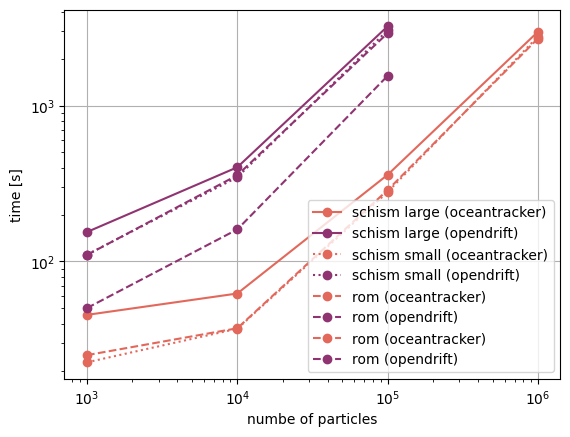

In [83]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')
        
    elif item == 'rom2':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [57]:
import pickle



path = {'ot_large': '/home/laurins/data/output/full_dataset_test_v03/full_dataset_test_v03_data_schism_large_particle_10000_output_3600_od/timing.pkl',
        'ot_rom': '/home/laurins/data/output/full_dataset_test_v03/full_dataset_test_v03_data_rom_particle_10000_output_3600_od/timing.pkl',
        'ot_rom_2': '/home/laurins/data/output/different_rom/different_rom_data_rom_particle_10000_output_0_od/timing.pkl',}

with open(path['ot_large'], 'rb') as f:
    ot_large = pickle.load(f)
with open(path['ot_rom'], 'rb') as f:
    ot_rom = pickle.load(f)
with open(path['ot_rom_2'], 'rb') as f:
    ot_rom_2 = pickle.load(f)

print(' --- SCHISM LARGE --- ')
[print(f'{item}:\t{ot_large[item]}') for item in ot_large]

print(' --- ROMS --- ')
[print(f'{item}:\t{ot_rom[item]}') for item in ot_rom]

print(' --- ROMS 2 --- ')
[print(f'{item}:\t{ot_rom_2[item]}') for item in ot_rom_2]


 --- SCHISM LARGE --- 
total time:	0:06:41.929591
configuration:	0:00:01.350181
preparing main loop:	0:00:00.323375
preparing main loop:moving elements to ocean:	0:00:00.004664
main loop:readers:	0:05:37.956550
main loop:readers:global_landmask:	0:00:03.971721
main loop:readers:postprocessing:	0:00:12.874159
main loop:	0:06:39.499642
main loop:readers:/hpcfreenas/hindcast/MarlbroughSounds_hindcast_10years_BenPhd_2019ver/2017/schism_marl201701*.nc:	0:05:12.915866
main loop:updating elements:	0:05:05.749627
main loop:updating elements:vertical mixing:	0:00:27.657312
cleaning up:	0:00:00.756359
 --- ROMS --- 
total time:	0:05:57.091486
configuration:	0:00:00.676179
preparing main loop:	0:00:01.107128
preparing main loop:making dynamical landmask:	0:00:00.000577
preparing main loop:moving elements to ocean:	0:00:00.803406
main loop:readers:	0:04:55.382557
main loop:readers:global_landmask:	0:00:02.135162
main loop:readers:postprocessing:	0:00:12.836880
main loop:	0:05:54.588023
main loop:r

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
import json
import pickle

path = {'ot': r'C:\Users\laurins\Documents\data\output\full_dataset_test_v01\full_dataset_test_v01_rom_100000_ot\full_dataset_test_v01_rom_100000_ot_caseInfo.json',
        'od': r'C:\Users\laurins\Documents\data\output\full_dataset_test_v01\full_dataset_test_v01_rom_100000_od\full_dataset_test_v01_rom_100000_od.pkl'}

with open(path['ot']) as f:
    ot_timing_data = json.load(f)['timers']

with open(path['od'], 'rb') as f:
    od_timing_data = pickle.load(f)

[print(f'{item}:\t{od_timing_data[item]}') for item in od_timing_data]
print(f"od roms reader: {od_timing_data['main loop:readers:roms native']}")
print(f"od roms steppr: {od_timing_data['main loop:updating elements']}")
print(f"od roms stepper/reader: {od_timing_data['main loop:updating elements']/od_timing_data['main loop:readers:roms native']}")



ot_timing_data

total time:	2:14:37.417733
configuration:	0:00:00.794427
preparing main loop:	0:00:04.598013
preparing main loop:making dynamical landmask:	0:00:00
preparing main loop:moving elements to ocean:	0:00:00.989752
main loop:readers:	1:37:31.613128
main loop:readers:global_landmask:	0:00:34.210980
main loop:readers:postprocessing:	0:02:23.235427
main loop:	2:14:27.263114
main loop:readers:roms native:	1:32:25.208760
main loop:updating elements:	1:45:15.650212
main loop:updating elements:vertical mixing:	0:26:59.572620
cleaning up:	0:00:04.762179
od roms reader: 1:32:25.208760
od roms steppr: 1:45:15.650212
od roms stepper/reader: 1.1389382231301244


['  378.85s  95% calls 00003: total_model_all,  (first call/remainder = 35.84s/343.01s',
 '  243.60s  61% calls 25386: setup_interp_time_step,  (first call/remainder =  4.36s/239.24s',
 '  242.62s  61% calls 04230: integration_step,  (first call/remainder =  0.58s/242.03s',
 '  150.97s  38% calls 25386: find_depth_cell,  (first call/remainder =  2.80s/148.17s',
 '   90.92s  23% calls 25386: find_cells_and_weights,  (first call/remainder =  1.38s/89.54s',
 '   80.02s  20% calls 04233: pre_step_bookkeeping,  (first call/remainder = 11.96s/68.06s',
 '   57.14s  14% calls 50784: interp_named_field_at_particle_locations,  (first call/remainder =  0.56s/56.57s',
 '   43.67s  11% calls 00003: reading_to_fill_time_buffer,  (first call/remainder = 17.21s/26.46s',
 '   19.30s   5% calls 08466: update_part_prop,  (first call/remainder =  1.51s/17.79s',
 '   12.11s   3% calls 04233: release_particles,  (first call/remainder = 10.57s/ 1.54s',
 '    0.71s   0% calls 00003: intialize_interplolation_g

* OpenDrift
  * "steppr"
    ```
    self.advect_ocean_current()
    self.vertical_advection()
    self.advect_wind()  # Wind shear in upper 10cm of ocean
    self.stokes_drift() 
    self.vertical_mixing()  # Including buoyancy and settling
    self.resuspension()
    ```
  * "reader"
    I cant find the exact timing information. I think its the full time spend in the roms reader. so finding cell. interpolation and all of that
* Oceantracker
  * steppr
    * advection and mixing \wo resusp 
  * reader
    


In [ ]:
from netCDF4 import Dataset
## Data sets complexity
df = Dataset(r'C:\Users\laurins\Documents\data\input\schism_large\schism_marl20170101_00z_3D.nc')
n_schism_large =df.variables['SCHISM_hgrid_node_x'].shape[0]
print(f"SCHISM LARGE:\t number of nodes: {n_schism_large}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\input\schism_small\NZfinite20170101_01z.nc')
n_schism_small = df.variables['SCHISM_hgrid_node_x'].shape[0]
print(f"SCHISM small:\t number of nodes: {n_schism_small}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\input\rom\doppio_his_20171101_0000_0001.nc')
df.variables['lon_psi'].shape
n_roms = df.variables['lon_psi'].shape[0]*df.variables['lon_psi'].shape[1]
print(f"ROMS:\t\t number of nodes: {n_roms}")
df.close()

print('\nRatio of nodes')
print('--------------')
print("schism large\t: schism small\t: roms")
print(f"{n_schism_large/n_roms:.2f}\t\t: {n_schism_small/n_roms:.2f}\t\t: {n_roms/n_roms:.2f}")


SCHISM LARGE:	 number of nodes: 149233
SCHISM small:	 number of nodes: 78397
ROMS:		 number of nodes: 25305

Ratio of nodes
--------------
schism large	: schism small	: roms
5.90		: 3.10		: 1.00


## predicting comp times for larger runs
(got to run v07 first)

In [51]:
timing_data['schism_large']
number_of_particles = 1e6
n_days = 10

expected_time_ot = n_days*(timing_data['schism_large']['oceantracker'][0]+(number_of_particles)*timing_data['schism_large']['oceantracker'][1])
print(f'Expected time for OT:\t\t{expected_time_ot/3600:.2f} hours')

expected_time_od = n_days*(timing_data['schism_large']['opendrift'][0]+number_of_particles*timing_data['schism_large']['opendrift'][1])
print(f'Expected time for OD:\t\t{expected_time_od/3600:.2f} hours')

print(f'Expected total for both:\t{(expected_time_ot+expected_time_od)/3600/24/5:.2f} days')

Expected time for OT:		8.06 hours
Expected time for OD:		93.65 hours
Expected total for both:	0.85 days


## v07 (full_dataset_test_v03)

### without output

In [14]:
path = r'/home/laurins/data/output/full_dataset_test_v03/full_dataset_test_v03.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','output_stepsize','time'],comment='#')
df = df[df['output_stepsize'] == 3600]


schism_large
schism_small
rom
schism_large
schism_small
rom


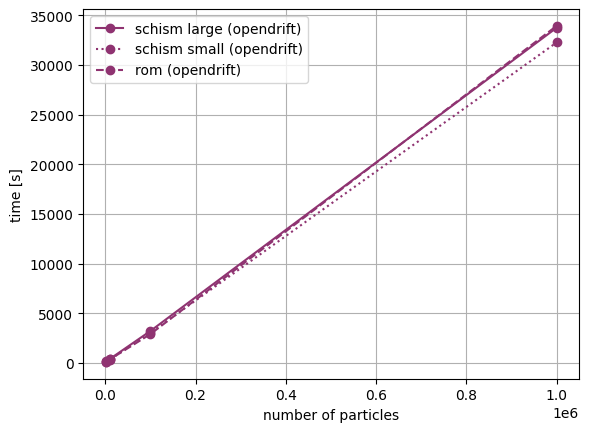

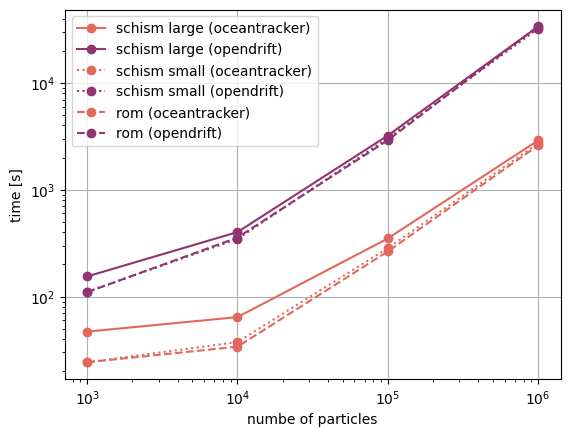

In [15]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('number of particles')
plt.ylabel('time [s]')
plt.grid(True)

plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [16]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}

print(f'time per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | time per particle [ms]\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['oceantracker'][1]*1e3:> 2.8f}")
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]*1e3:>2.8f}")
    

print(f'\nspeed-up per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | Speed up\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1]}")

time per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | time per particle [ms]	
---------------------------------------
schism_large   	 |  2.85253550
schism_large   	 | 33.69622067
schism_small   	 |  2.70658847
schism_small   	 | 32.25403244
rom            	 |  2.58930905
rom            	 | 33.99872778

speed-up per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | Speed up	
---------------------------------------
schism_large   	 | 11.81272613590152
schism_small   	 | 11.916858750000406
rom            	 | 13.13042481483746


## v06 (full_dataset_test_v02)
fixed the "data time step size"-bug (OD is based on time step size while OT is based on data time step fractions)

In [90]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v02\full_dataset_test_v02.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','time'],comment='#')
df['time'].sum()/3600

4.273381268055556

rom
schism_small
schism_large
rom
schism_small
schism_large


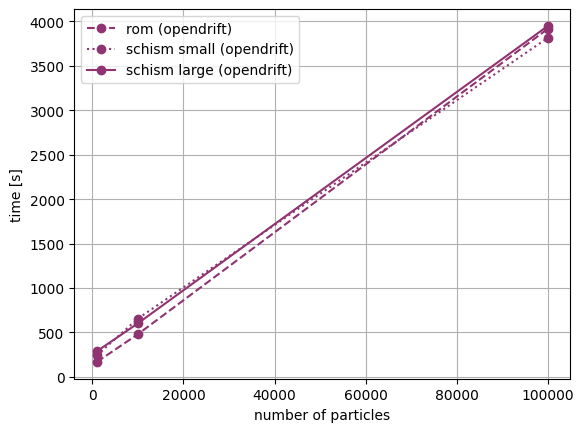

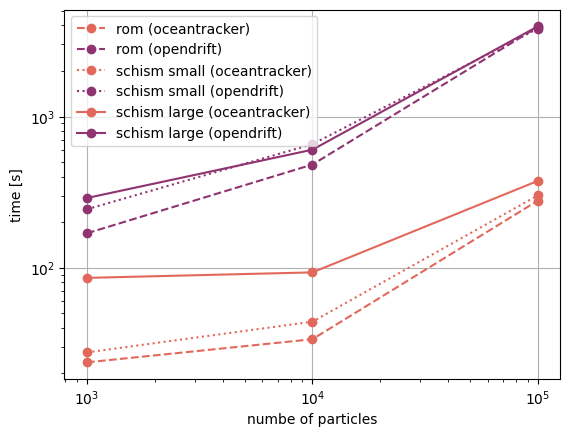

In [111]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('number of particles')
plt.ylabel('time [s]')
plt.grid(True)

plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [107]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}
def print_dict_as_json(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            print_dict_as_json(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

print(f'time per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | time per particle [ms]\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['oceantracker'][1]*1e3:> 2.8f}")
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]*1e3:>2.8f}")
    

print(f'\nspeed-up per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | Speed up\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1]}")

time per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | time per particle [ms]	
---------------------------------------
schism_large   	 |  3.01232475
schism_large   	 | 37.04096588
schism_small   	 |  2.80051273
schism_small   	 | 35.66853046
rom            	 |  2.62756634
rom            	 | 37.97882372

speed-up per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | Speed up	
---------------------------------------
schism_large   	 | 12.296471650047515
schism_small   	 | 12.736428626286147
rom            	 | 14.453992316657367


schism_large
schism_small
rom


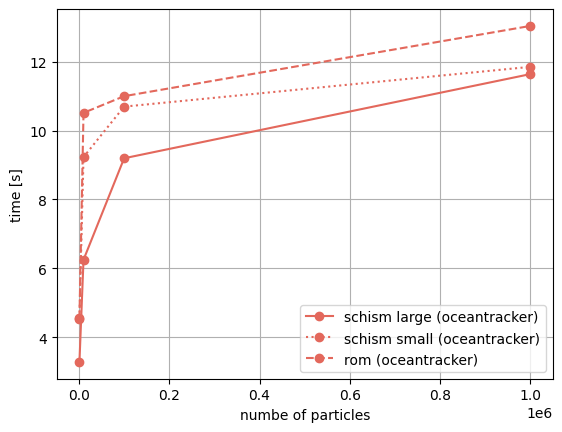

In [5]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            np.array(df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'])/np.array(df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time']),
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')


    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            np.array(df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'])/np.array(df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time']),
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')


    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            np.array(df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'])/np.array(df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time']),
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')


plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.grid(True)

## What is actually in those roms files?

In [32]:
from netCDF4 import Dataset
df = Dataset(r'/scratch/local1/ROMS/doppio_bay_02/doppio_his_20180101_0000_0001.nc')
print(df.variables['ocean_time'])
df.close

<class 'netCDF4._netCDF4.Variable'>
float64 ocean_time(ocean_time)
    long_name: time since initialization
    units: seconds since 2006-01-01 00:00:00
    calendar: gregorian_proleptic
    field: time, scalar, series
unlimited dimensions: ocean_time
current shape = (25,)
filling on, default _FillValue of 9.969209968386869e+36 used


<bound method Dataset.close of <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file: doppio_his_4383_0001.nc
    format: netCDF-4/HDF5 file
    Conventions: CF-1.4, SGRID-0.3
    type: ROMS/TOMS history file
    title: DOPPIO
    var_info: /home/om/roms/doppio/7km/varinfo_daily.dat
    rst_file: doppio_rst_4383.nc
    his_base: doppio_his_4383
    avg_base: doppio_avg_4383
    flt_file: doppio_flt_4383.nc
    grd_file: /home/om/roms/doppio/7km/grid_doppio_JJA_v12.nc
    ini_file: doppio_ini_4383.nc
    tide_file: /home/om/roms/doppio/7km/doppio_tide_7km.nc
    frc_file_01: ../Data/Pair_ncepnam_3hourly_MAB_and_GoM.nc
    frc_file_02: ../PSAS/doppio_fwd_4383_002.nc
    bry_file: ../Data/doppio_bry.nc
    clm_file: ../Data/doppio_clm.nc
    nud_file: /home/om/roms/doppio/7km/doppio_nudgcoef_7km_1500-2000_GS.nc
    script_file: nl_ocean_doppio.in
    fpos_file: floats.in
    NLM_LBC: 
EDGE:  WEST   SOUTH  EAST   NORTH  
zeta:  Cha    Cha    Cha    

## What is the data time step size?

In [74]:
from netCDF4 import Dataset
df = Dataset(r'C:\Users\laurins\Documents\data\input\schism_large\schism_marl20170101_00z_3D.nc')
print(f"schism large:\t{(df.variables['time'][1] - df.variables['time'][0])}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\input\schism_small\NZfinite20170101_01z.nc')
print(f"schism small:\t{(df.variables['time'][1] - df.variables['time'][0])}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\input\rom\doppio_his_20171101_0000_0001.nc')
print(f"roms:\t\t{df.variables['ocean_time'][1]-df.variables['ocean_time'][0]}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\output\full_dataset_test_v01\full_dataset_test_v01_rom_1000_od\tracks.nc')
print(f"\nod output time range:\t{(df.variables['time'][1] - df.variables['time'][0])/3600}??")
df.close()


schism large:	1800.0
schism small:	3600.0
roms:		3600.0

od output time range:	48.0??


## v05 (full_dataset_test_v01)
v04 surprised me as OpenDrifts ROMS performance was much worse then I expected.
I checked the code for configuration issues but couldn't find any.
I reran v04 with much larger time steps and pickled the timing data from OpdenDrift to figure out where its spending all its time


In [77]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v01\full_dataset_test_v01.txt'

df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

df['time'].sum()/3600

8.408390175833334

rom
schism_small
schism_large


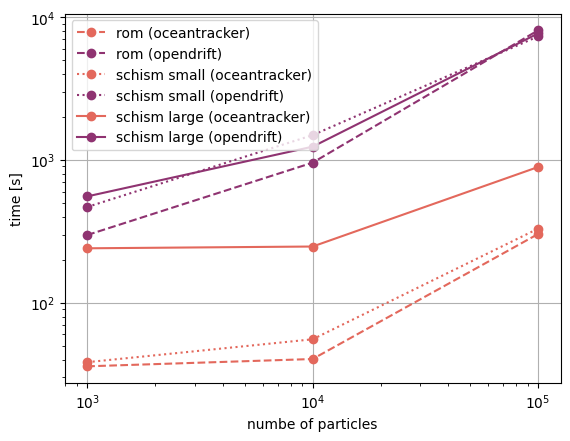

In [8]:
df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [38]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}
def print_dict_as_json(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            print_dict_as_json(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

print()
print(f'speed-up per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | Speed up\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1]}")


speed-up per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | Speed up	
---------------------------------------
schism_large   	 | 10.55226736777182
schism_small   	 | 22.574631940507427
rom            	 | 28.300684594156643


## v04
* three datasets (schism small, schism large, roms)
* 2 days
* 1m time steps 
* \wo output


In [79]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v00\full_dataset_test_v00.txt'

df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

df['time'].sum()/3600

9.001028615

schism_small
schism_large
rom


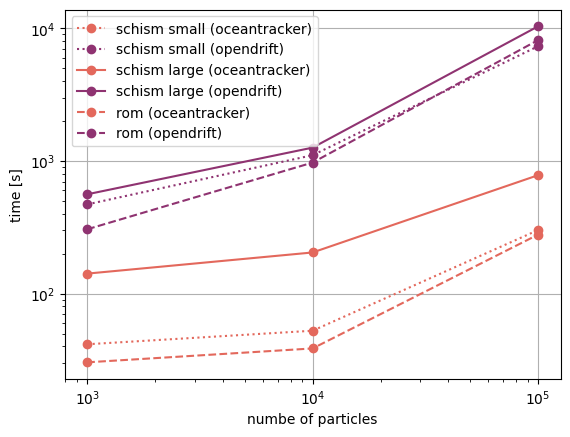

In [3]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v00\full_dataset_test_v00.txt'

df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [26]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}
def print_dict_as_json(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            print_dict_as_json(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))
print_dict_as_json(timing_data)

print()
print(f'speed-up per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | Speed up\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1]}")

schism_large
	oceantracker
		[1.37351397e+02 6.44412357e-03]
	opendrift
		[3.66491861e+02 9.98950432e-02]
schism_small
	oceantracker
		[3.25487798e+01 2.68320803e-03]
	opendrift
		[4.07295092e+02 6.92554177e-02]
rom
	oceantracker
		[2.06679451e+01 2.57205501e-03]
	opendrift
		[2.03147729e+02 7.95212750e-02]

speed-up per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | Speed up	
---------------------------------------
schism_large   	 | 15.50172682258241
schism_small   	 | 25.810677695072638
rom            	 | 30.917408363307672


## v03
* od was not using the smaller step size - fixed that
* (classic confirmation bias situation btw)


In [7]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v03.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

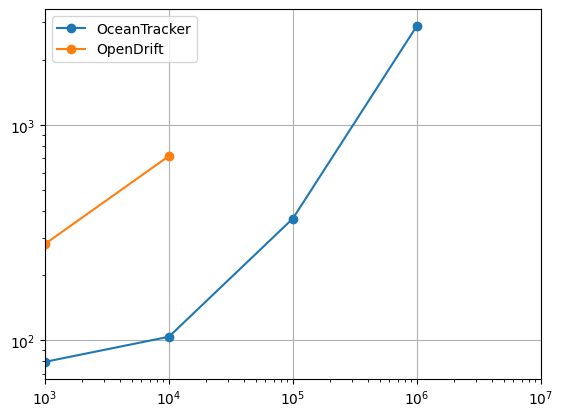

In [33]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e3,1e7)
plt.legend()

In [14]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

79.75468787690359 0.0028001145008932373
231.26229911111125 0.04851583088888887
speedup ot: 17.326373929856192


## v02 - buggy
* disables output writing in OT
* reused the OD points from v01


In [16]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v02.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

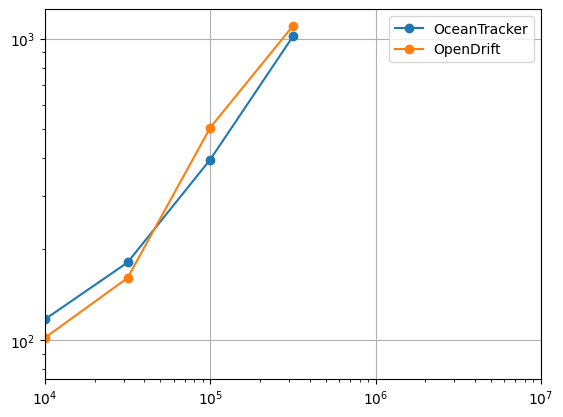

In [17]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [18]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

87.40747294234151 0.0029498262776123324
87.40835403468479 0.0032843996675228334
speedup ot: 1.1134213877100971


## v01 - buggy 
* more release points
* 1min time steps
* ~~no output writing~~ I misconfigured OT and it still wrote the tracks
* integration scheme changed to rk4


In [13]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v01.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

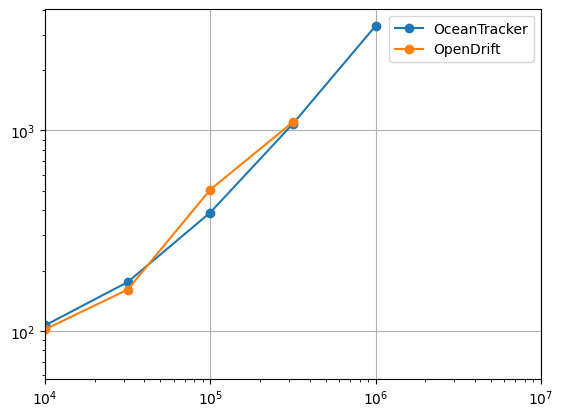

In [14]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [15]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

66.5367369193496 0.003251868681948735
87.40835403468479 0.0032843996675228334
speedup ot: 1.010003782057584


## v00 - initial 

In [11]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v00.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

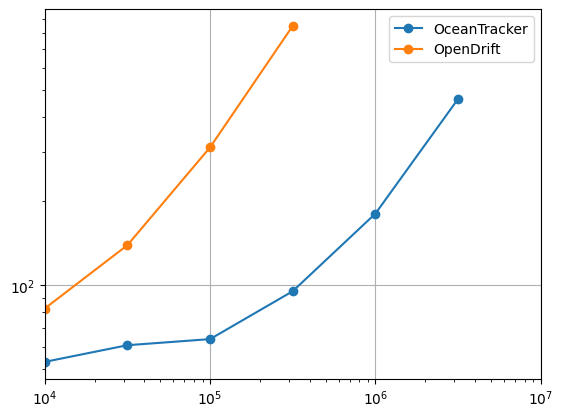

In [12]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [32]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

59.67797034330147 0.00012698916957450088
65.73324578927514 0.002469448901137713
speedup ot: 19.446137882561384
